In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_typescript(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="typescript",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/typescript_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (TYPESCRIPT, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (TYPESCRIPT, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_typescript(save_directory="./", split="train")

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

train-00000-of-00027.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

train-00001-of-00027.parquet:   0%|          | 0.00/394M [00:00<?, ?B/s]

train-00002-of-00027.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

train-00003-of-00027.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00004-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00005-of-00027.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

train-00006-of-00027.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

train-00007-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00008-of-00027.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

train-00009-of-00027.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00010-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00011-of-00027.parquet:   0%|          | 0.00/392M [00:00<?, ?B/s]

train-00012-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00013-of-00027.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

train-00014-of-00027.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

train-00015-of-00027.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

train-00016-of-00027.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

train-00017-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00018-of-00027.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

train-00019-of-00027.parquet:   0%|          | 0.00/387M [00:00<?, ?B/s]

train-00020-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00021-of-00027.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00022-of-00027.parquet:   0%|          | 0.00/389M [00:00<?, ?B/s]

train-00023-of-00027.parquet:   0%|          | 0.00/386M [00:00<?, ?B/s]

train-00024-of-00027.parquet:   0%|          | 0.00/392M [00:00<?, ?B/s]

train-00025-of-00027.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

train-00026-of-00027.parquet:   0%|          | 0.00/390M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/56 [00:00<?, ?it/s]

Saving the dataset (0/56 shards):   0%|          | 0/10547331 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (TYPESCRIPT, train) successfully downloaded and saved to './/typescript_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./typescript_train_dataset")

Loading dataset from disk:   0%|          | 0/56 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 10547331
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'cypress/support/base.component.ts', 'max_stars_repo_name': 'frederikprijck/ngx-bootstrap', 'max_stars_count': 0, 'id': '0', 'content': '<filename>cypress/support/base.component.ts<gh_stars>0\nimport { AttrObj } from \'./interfaces\';\n\nexport abstract class BaseComponent {\n  titleSel = \'h1\';\n  titleLinkSel = \'.content-header a\';\n  usageExSel = \'demo-top-section h2\';\n  usageExCodeSel = \'demo-top-section .prettyprint\';\n  abstract pageUrl: string;\n  titleDefaultExample = \'Usage\';\n\n  navigateTo() {\n    const bsVersionRoute = Cypress.env(\'bsVersion\') ? `?_bsVersion=bs${Cypress.env(\'bsVersion\')}` : \'\';\n    cy.visit(`${ this.pageUrl }${bsVersionRoute}`);\n  }\n\n  scrollToMenu(subMenu: string) {\n    cy.get(\'examples h3\').contains(subMenu).scrollIntoView();\n  }\n\n  clickOnDemoMenu(subMenu: string) {\n    cy.get(\'add-nav\').contains(\'a\', subMenu).click();\n  }\n\n  clickByText(parent: string, text: string) {\n    cy.get(parent).contain

In [7]:
dataset = dataset.sort(column_names=["max_stars_count", "max_stars_repo_name"], reverse=[True, False])

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
import { WebpackPlugin } from './types/plugin';
declare const Plugin: WebpackPlugin;
export = Plugin;



Example 1:
import Vue from "../index";

declare module "../vue" {
  // add instance property and method
  interface Vue {
    $instanceProperty: string;
    $instanceMethod(): void;
  }

  // add static property and method
  interface VueConstructor {
    staticProperty: string;
    staticMethod(): void;
  }
}

// augment ComponentOptions
declare module "../options" {
  interface ComponentOptions<V extends Vue> {
    foo?: string;
  }
}

const vm = new Vue({
  props: ["bar"],
  data: {
    a: true
  },
  foo: "foo",
  methods: {
    foo() {
      this.a = false;
    }
  },
  computed: {
    BAR(): string {
      return this.bar.toUpperCase();
    }
  }
});

vm.$instanceProperty;
vm.$instanceMethod();

Vue.staticProperty;
Vue.staticMethod();



Example 2:
<filename>types/test/umd-test.ts
const vm = new Vue({
  template: "<div>hi</div>"
});

const options: Vue.ComponentOpti

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/10547331 [00:00<?, ? examples/s]

Example 0:
import { WebpackPlugin } from './types/plugin';
declare const Plugin: WebpackPlugin;
export = Plugin;

Average Line Length: 24.75

Example 1:
import Vue from "../index";

declare module "../vue" {
  // add instance property and method
  interface Vue {
    $instanceProperty: string;
    $instanceMethod(): void;
  }

  // add static property and method
  interface VueConstructor {
    staticProperty: string;
    staticMethod(): void;
  }
}

// augment ComponentOptions
declare module "../options" {
  interface ComponentOptions<V extends Vue> {
    foo?: string;
  }
}

const vm = new Vue({
  props: ["bar"],
  data: {
    a: true
  },
  foo: "foo",
  methods: {
    foo() {
      this.a = false;
    }
  },
  computed: {
    BAR(): string {
      return this.bar.toUpperCase();
    }
  }
});

vm.$instanceProperty;
vm.$instanceMethod();

Vue.staticProperty;
Vue.staticMethod();

Average Line Length: 14.76595744680851

Example 2:
<filename>types/test/umd-test.ts
const vm = new Vue({
 

In [10]:
sliced_dataset = dataset[:2500000]

In [11]:
del dataset

In [12]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [13]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    2.500000e+06
mean     2.814000e+01
std      8.723625e+00
min      1.031707e+00
25%      2.260526e+01
50%      2.700000e+01
75%      3.216667e+01
max      1.290000e+02
Name: avg_line_length, dtype: float64


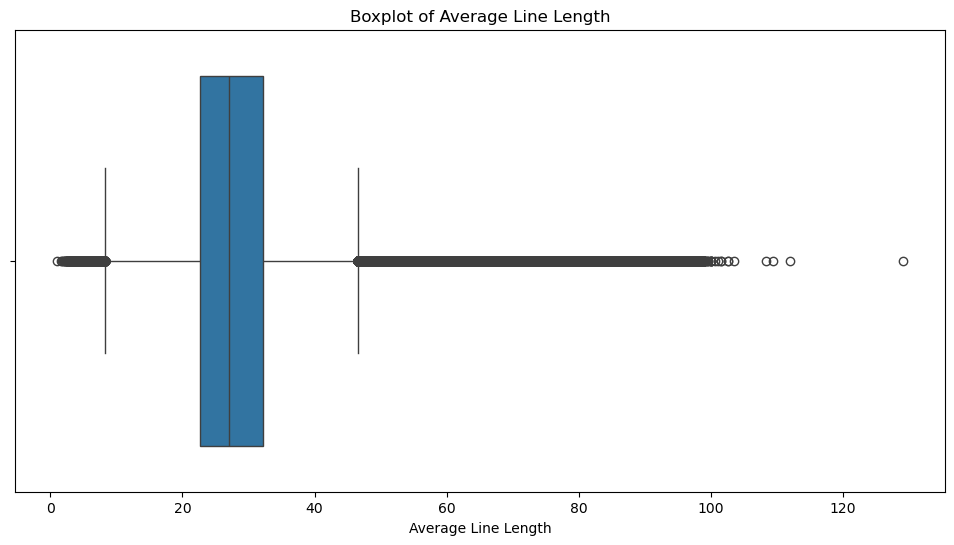

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [15]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1


In [16]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 84019


In [17]:
outliers['avg_line_length'].describe()

count    84019.000000
mean        55.159799
std         12.151462
min          1.031707
25%         48.777931
50%         52.581395
75%         59.666667
max        129.000000
Name: avg_line_length, dtype: float64

In [18]:
df.drop(outliers.index, inplace=True)

In [19]:
df['avg_line_length'].describe()

count    2.415981e+06
mean     2.720035e+01
std      6.880487e+00
min      8.266667e+00
25%      2.245455e+01
50%      2.673846e+01
75%      3.152795e+01
max      4.650847e+01
Name: avg_line_length, dtype: float64

In [20]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

32.85

In [21]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    2.415981e+06
mean     8.250730e+01
std      2.953171e+02
min      1.000000e+00
25%      1.600000e+01
50%      3.800000e+01
75%      8.500000e+01
max      6.823100e+04
Name: line_count, dtype: float64

In [22]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [23]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 1919015
Number of examples with line count in range 101-200: 301799
Number of examples with line count in range 201-300: 94348
Number of examples with line count in range 301-400: 40772
Number of examples with line count in range 401-500: 20193
Number of examples with line count in range 501-600: 11643
Number of examples with line count in range 601-700: 7017
Number of examples with line count in range 701-800: 4818
Number of examples with line count in range 801-900: 3243
Number of examples with line count in range 901-1000: 2281
Number of examples with line count in range 1000+: 10852


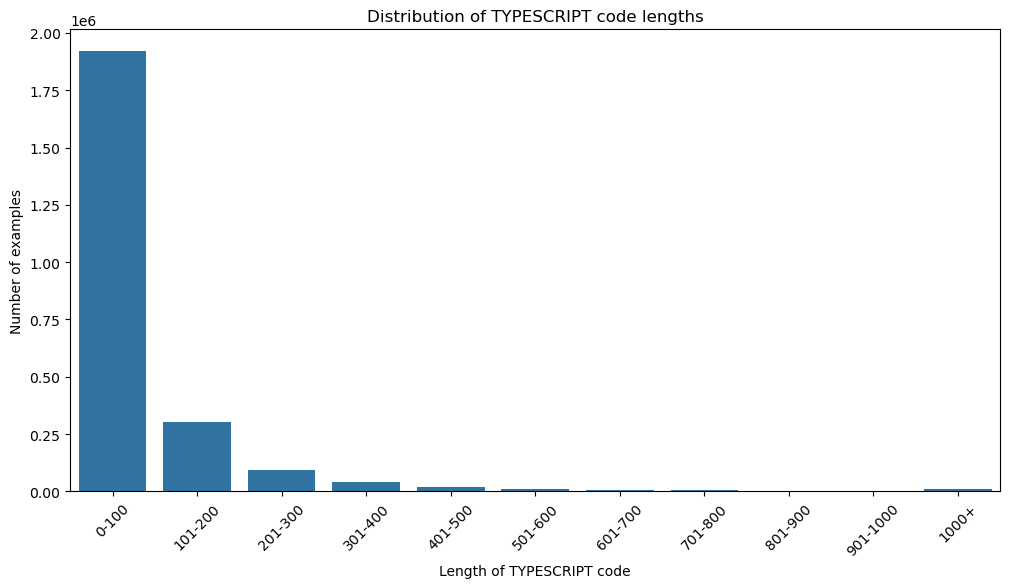

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of TYPESCRIPT code lengths")
plt.xlabel("Length of TYPESCRIPT code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [25]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,1919015,1919015,79.430053,79.430053
1,101-200,301799,2220814,12.491779,91.921832
2,201-300,94348,2315162,3.905163,95.826995
3,301-400,40772,2355934,1.687596,97.514591
4,401-500,20193,2376127,0.835810,98.350401
5,501-600,11643,2387770,0.481916,98.832317
6,601-700,7017,2394787,0.290441,99.122758
7,701-800,4818,2399605,0.199422,99.322180
8,801-900,3243,2402848,0.134231,99.456411
9,901-1000,2281,2405129,0.094413,99.550824


In [26]:
np.percentile(df['line_count'], 90)

174.0

In [27]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [28]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,import { WebpackPlugin } from './types/plugin'...,24.750000,4
1,"import Vue from ""../index"";\n\ndeclare module ...",14.765957,47
2,<filename>types/test/umd-test.ts\nconst vm = n...,17.444444,9
3,<filename>scripts/jest/typescript/jest.d.ts\nd...,28.802469,81
4,'use strict';\n\nconst path = require('path');...,29.780488,41


In [29]:
df_filtered.shape

(2415981, 3)

In [30]:
df_filtered = df_filtered[df_filtered['line_count'] <= 200]
df_filtered.shape

(2220814, 3)

In [31]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 32.5]
df_filtered.shape

(1772428, 3)

In [32]:
df_filtered.head()

,content,avg_line_length,line_count
0,import { WebpackPlugin } from './types/plugin'...,24.750000,4
1,"import Vue from ""../index"";\n\ndeclare module ...",14.765957,47
2,<filename>types/test/umd-test.ts\nconst vm = n...,17.444444,9
3,<filename>scripts/jest/typescript/jest.d.ts\nd...,28.802469,81
4,'use strict';\n\nconst path = require('path');...,29.780488,41


In [33]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     2.415981e+06  2.415981e+06
mean      2.720035e+01  8.250730e+01
std       6.880487e+00  2.953171e+02
min       8.266667e+00  1.000000e+00
25%       2.245455e+01  1.600000e+01
50%       2.673846e+01  3.800000e+01
75%       3.152795e+01  8.500000e+01
max       4.650847e+01  6.823100e+04

       avg_line_length    line_count
count     1.772428e+06  1.772428e+06
mean      2.437209e+01  4.717744e+01
std       4.813771e+00  4.335479e+01
min       8.266667e+00  1.000000e+00
25%       2.114286e+01  1.500000e+01
50%       2.480392e+01  3.200000e+01
75%       2.813793e+01  6.600000e+01
max       3.250000e+01  2.000000e+02


In [34]:
data_dict_ts = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_ts[f"typescript_{i}"] = example

In [35]:
assert len(data_dict_ts) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [36]:
for i, (k,v) in enumerate(data_dict_ts.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example typescript_0:
import { WebpackPlugin } from './types/plugin';
declare const Plugin: WebpackPlugin;
export = Plugin;



Example typescript_1:
import Vue from "../index";

declare module "../vue" {
  // add instance property and method
  interface Vue {
    $instanceProperty: string;
    $instanceMethod(): void;
  }

  // add static property and method
  interface VueConstructor {
    staticProperty: string;
    staticMethod(): void;
  }
}

// augment ComponentOptions
declare module "../options" {
  interface ComponentOptions<V extends Vue> {
    foo?: string;
  }
}

const vm = new Vue({
  props: ["bar"],
  data: {
    a: true
  },
  foo: "foo",
  methods: {
    foo() {
      this.a = false;
    }
  },
  computed: {
    BAR(): string {
      return this.bar.toUpperCase();
    }
  }
});

vm.$instanceProperty;
vm.$instanceMethod();

Vue.staticProperty;
Vue.staticMethod();



Example typescript_2:
<filename>types/test/umd-test.ts
const vm = new Vue({
  template: "<div>hi</div>"
});


In [37]:
import json

with open('typescript_train.json', 'w') as f:
    json.dump(data_dict_ts, f)
    print("Saved to 'typescript_train.json'")

Saved to 'typescript_train.json'
